In [1]:
import sys
#import Backtest
from GeneralBacktest import Backtest,Position,Bid
import pandas as pd
import matplotlib.pyplot as plt
import random
import warnings
import pickle
import yfinance as yf
import pandas_ta as ta
#warnings.filterwarnings("ignore")

In [23]:
data = pd.read_csv("test_data.csv",index_col = 0)
data.index = pd.to_datetime(data.index)

In [24]:
data_k = data.ewm(span = 12, adjust = False, min_periods = 12).mean()
data_d = data.ewm(span = 26, adjust = False, min_periods = 26).mean()
dif = data_k - data_d
dea = data.ewm(span=9, adjust=False, min_periods=9).mean()
macd = dif-dea

In [38]:
macd = data.ta.macd(close='AAPL', fast=12, slow=26, signal=9, append=False)

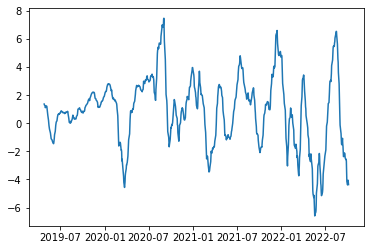

In [39]:
plt.plot(macd['MACD_12_26_9'])

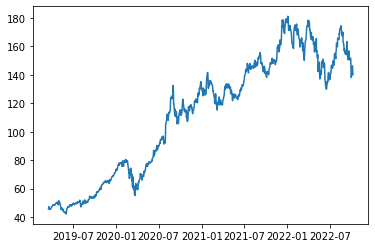

In [40]:
plt.plot(data['AAPL'])

In [46]:
d = data.loc[data.index[100]]
d[d>100]

ACN      182.256195
ADBE     288.649994
AMGN     187.009476
AMT      208.109543
AVGO     245.325180
AXP      118.830658
BA       329.050537
BKNG    1916.890015
BLK      384.125366
CAT      108.313309
CHTR     376.279999
COST     257.778992
CRM      140.720001
CVX      104.210098
DHR      136.711792
DIS      134.941528
FDX      151.372162
GD       166.926743
GS       187.410950
HD       191.999588
HON      154.238876
IBM      110.156677
JNJ      121.108727
LIN      182.434204
LLY      107.304718
LMT      345.682373
MA       265.362488
MCD      201.372925
META     185.369995
MMM      144.429550
MSFT     131.497864
NFLX     310.829987
PEP      117.118492
PG       107.855415
PYPL     102.720001
SPG      127.120285
TMO      270.015350
TXN      110.880638
UNH      231.692032
UNP      154.755478
UPS      104.635628
V        172.730896
WMT      100.224319
Name: 2019-08-12 00:00:00, dtype: float64

In [86]:
class MACD:
    def __init__(self,data):
        self.data = data
        self.macd = self.get_macd(data)
        self.signal_change = (self.macd*self.macd.shift(1)).lt(0)
        
    def get_macd(self,data):
        res = pd.DataFrame()
        for ticker in data.columns:
            macd = data.ta.macd(close=ticker, fast=12, slow=26, signal=9, append=False)
            res[ticker] = macd['MACD_12_26_9']
        res.index = data.index
        return res
    
    def get_targets(self,ti):
        buying = []
        selling = []
        
        keys = self.signal_change.loc[ti]
        keys = keys[keys>0].keys()
        
        for key in keys:
            if self.macd.loc[ti][key] < 0:
                selling.append(key)
            else:
                buying.append(key)
        print(buying,selling)
        return buying, selling
        
        
    def predict(self,ti,df,positions,cash,full_data):
#         if ti.minute == 0 or ti.minute == 30:
#             print("================={}=================".format(ti))
        bid_list = []
        buying,selling = self.get_targets(ti)
        
        for pos in positions.values():
            if  pos.ticker in selling:
                bid = Bid(ticker = pos.ticker,shares = pos.shares,price = df.iloc[-1][pos.ticker],bid_type = 0)
                bid_list.append(bid)
                cash+=pos.shares * pos.price
        
        for ticker in buying:
            price = df.iloc[-1][ticker]
            amount = cash/len(buying)
            shares = amount//price
            bid = Bid(ticker = ticker, shares = shares, price = price,bid_type = 1)
            bid_list.append(bid)
        
        return bid_list
            
        

In [97]:
10000//7

1428

# Load sample data

In [87]:
macd = MACD(data)

In [88]:
macd_bt = Backtest(data, macd)

In [89]:
macd_bt.backtest_full()

[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
['BA', 'EXC'] ['MMM', 'UPS']
[] []
['DUK', 'NEE'] []
['CVS'] ['INTC', 'TGT', 'XOM']
['DHR'] ['BA', 'T']
['GE', 'TMO'] ['DD']
['BMY', 'GILD'] ['DUK', 'NVDA']
[] ['EXC', 'GOOG', 'GOOGL', 'KHC']
[] ['CAT', 'DOW', 'EMR', 'LOW', 'NEE', 'NKE']
[] ['CRM', 'CSCO', 'FDX', 'LIN', 'TMO']
['LIN'] []
['AMT', 'NEE'] ['AVGO', 'GM', 'HD', 'NFLX']
[] ['AAPL', 'ACN', 'BKNG', 'BMY', 'TXN']
[] ['GD', 'GS']
['ACN'] ['BAC', 'CVS', 'JNJ', 'SCHW']
['T'] ['BLK', 'MS']
['UNH'] ['C']
['BMY', 'CSCO', 'CVX', 'PFE', 'VZ'] ['DHR']
['ABBV', 'DHR'] []
['JNJ', 'MDT', 'MRK'] ['AMZN', 'CVX', 'ORCL', 'RTX']
[] ['GE', 'QCOM']
['TGT'] ['BMY']
[] ['ABBV', 'CSCO', 'DHR', 'GILD', 'JNJ', 'JPM', 'UNP']
['DHR'] ['USB']
[] ['ADBE', 'CMCSA', 'HON', 'META', 'VZ']
[] ['COF', 'COST', 'F', 'PG', 'SBUX']
['HON', 'SBUX'] ['MSFT']
['COF', 'COST', 'PG', 'USB'] []
['ABT', 'MSFT', 'TMO'] 

[] ['BAC']
['GILD'] ['AXP', 'BKNG', 'SPG']
['BKNG', 'CMCSA', 'PEP', 'SPG', 'UNH'] ['MET']
['ABT'] ['AIG', 'USB']
['COST', 'HON', 'MDLZ', 'NEE'] []
['BMY', 'MRK'] ['SPG']
['CHTR', 'WMT'] ['GD']
[] ['C', 'F', 'HON', 'MDLZ', 'MMM', 'MRK']
['C', 'DIS'] ['BMY']
['MDLZ', 'MET', 'PM'] []
['F', 'JNJ', 'MMM'] []
['HON', 'MCD', 'MRK', 'PFE', 'T'] []
['BMY', 'EXC', 'JPM', 'MDT'] ['BK']
['AIG', 'IBM', 'KO', 'VZ'] ['C', 'NKE']
[] []
['GE', 'GM', 'INTC'] []
['C', 'GD', 'LMT', 'NKE', 'SO'] []
[] []
['SBUX'] ['BA', 'INTC']
['BAC', 'CVX'] ['GE', 'GILD']
['DUK'] ['NKE', 'T']
['COF', 'USB'] []
[] ['CVX', 'LLY']
[] ['GM', 'GS', 'MMM']
['NKE'] ['C', 'COF']
['CVS'] ['NKE', 'V']
['NKE', 'V'] ['ABBV']
['C', 'GM'] ['AIG', 'AMT']
['AXP', 'COF', 'GS', 'T'] ['AMGN']
['MMM', 'WBA'] []
['AIG', 'BK'] ['ORCL']
['RTX', 'SPG'] ['AIG']
['CVX'] ['NFLX']
['BA', 'SCHW', 'XOM'] ['CSCO']
[] ['BA', 'XOM']
['COP'] ['SO']
[] ['EXC']
['NFLX'] ['BK', 'COP', 'CVX', 'DUK', 'USB', 'WBA']
[] ['C', 'GS', 'T']
['GS', 'ORCL', 'T'] []
[]

['KHC'] ['EXC', 'INTC', 'MO', 'MS']
['IBM', 'MRK'] ['GILD']
[] ['AVGO', 'COST']
['BK'] ['CVS']
['GD'] []
['INTC'] []
[] []
['AVGO', 'LMT', 'PEP', 'UNP'] ['INTC']
[] ['AVGO']
[] ['TXN']
['MSFT'] ['WFC']
['ACN', 'AVGO', 'EXC', 'PG', 'UNH', 'WFC'] []
['COST', 'DD', 'GOOG', 'GOOGL', 'GS', 'NVDA', 'TXN'] []
['BLK', 'INTC', 'LIN', 'MA', 'TGT', 'UPS', 'V'] ['BA', 'PG']
['AAPL', 'AMZN', 'CVS', 'LLY', 'MO', 'NEE', 'NKE'] []
['ADBE', 'DUK', 'HON', 'WBA', 'WMT'] ['IBM']
['ABT', 'CAT', 'MDLZ', 'MS'] ['INTC', 'KHC', 'MCD']
[] ['HON']
['ABBV', 'AMT', 'SBUX'] []
['KO'] ['ABBV', 'C', 'COF', 'WBA']
['ABBV', 'CSCO', 'PG'] ['LMT', 'MA', 'MO', 'V']
[] ['DD', 'SBUX', 'TXN']
['CL', 'EMR', 'MCD', 'QCOM'] []
['DD', 'PFE'] []
['DHR', 'FDX', 'HON', 'JNJ', 'KHC'] []
['AMGN', 'WBA'] ['DHR']
[] []
['SBUX'] []
[] ['JNJ']
['BA', 'JNJ', 'MMM'] ['MS']
['BMY', 'DOW'] ['GD', 'MMM']
['MA', 'MMM'] ['AMT']
['META'] ['SBUX']
[] ['AMGN', 'DUK']
[] ['EMR', 'GS', 'JNJ', 'JPM', 'USB']
[] ['AIG', 'BKNG', 'GE', 'KHC', 'MET', 'RTX

# After backtest, check all historical transactions with transaction_history, a dataframe that recorded each bid, its transaction cost and pnl.

In [95]:
macd_bt.transaction_history[macd_bt.transaction_history.shares == 0]

,dt,ticker,type,price,shares,amount,transaction_cost,pnl
4,2019-05-01,CVS,1,52.443317,0.0,0.0,0.0,0.0
7,2019-05-03,GE,1,82.791428,0.0,0.0,0.0,0.0
8,2019-05-03,TMO,1,276.422577,0.0,0.0,0.0,0.0
14,2019-05-09,TMO,0,266.859314,0.0,0.0,0.0,0.0
16,2019-05-13,AMT,1,183.586258,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2998,2022-10-07,NFLX,0,224.750000,0.0,0.0,0.0,0.0
3002,2022-10-07,GILD,0,64.290001,0.0,0.0,0.0,0.0
3003,2022-10-07,SBUX,0,87.029999,0.0,0.0,0.0,0.0
3004,2022-10-07,MRK,0,87.599998,0.0,0.0,0.0,0.0


In [96]:
macd_bt.transaction_history

,dt,ticker,type,price,shares,amount,transaction_cost,pnl
0,2019-04-26,BA,1,371.871307,134.0,49830.755188,0.0,0.000000
1,2019-04-26,EXC,1,32.013447,1561.0,49972.990467,0.0,0.000000
2,2019-04-30,DUK,1,79.060822,1.0,79.060822,0.0,0.000000
3,2019-04-30,NEE,1,45.179932,2.0,90.359863,0.0,0.000000
4,2019-05-01,CVS,1,52.443317,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...
3001,2022-10-07,COP,0,118.510002,701.0,83075.511497,0.0,2025.889572
3002,2022-10-07,GILD,0,64.290001,0.0,0.000000,0.0,0.000000
3003,2022-10-07,SBUX,0,87.029999,0.0,0.000000,0.0,0.000000
3004,2022-10-07,MRK,0,87.599998,0.0,0.000000,0.0,0.000000


<AxesSubplot:>

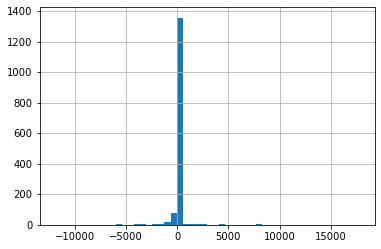

In [91]:
#histogram of pnl
macd_bt.transaction_history[macd_bt.transaction_history.type ==0]['pnl'].hist(bins = 50)

# The portfolio_tracker records the # of bids, length of positions, cash value, position value, total value at each ti. 
# The bah column is the value assuming we buy all the tickers when it begins

In [92]:
macd_bt.portfolio_tracker

,dt,bid_count,position_count,cash_value,positions_value,total_value,bah
0,2019-03-20,0,0,100000.000000,0.000000,100000.000000,100000.000000
1,2019-03-21,0,0,100000.000000,0.000000,100000.000000,100954.473649
2,2019-03-22,0,0,100000.000000,0.000000,100000.000000,99110.452320
3,2019-03-25,0,0,100000.000000,0.000000,100000.000000,99028.807052
4,2019-03-26,0,0,100000.000000,0.000000,100000.000000,99948.807689
...,...,...,...,...,...,...,...
891,2022-09-30,3,3,81109.622301,20119.570381,101229.192682,145482.006651
892,2022-10-03,0,3,81109.622301,20009.309242,101118.931543,147742.010895
893,2022-10-04,1,4,60.000376,101579.022835,101639.023211,152403.253638
894,2022-10-05,3,7,60.000376,101913.220139,101973.220514,151698.105409


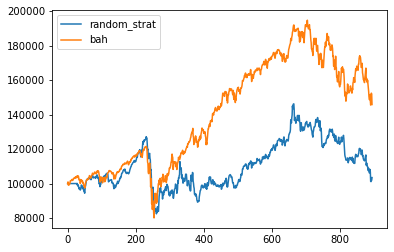

In [93]:
macd_bt.plot()

# 

# Upload to dashboard
## the upload_to_dashboard method will upload this graph to dashboard.
## make sure the crediential file "algo-trade-dashboard-80cae071e907.json" is under current directory, also install the related packages in requirements.txt

## to upload, call the function with the strategy name, if the name already exist in the gcloud, the previous data will be overwritten

In [15]:
random_strat.upload_to_dashboard("random_demo_0912")

Data uploaded.


# Check on dashboard:
https://tigaji-algo-trade-dashboard-dashboard-gv8r0a.streamlitapp.com/